# PID Tuning using Genetic Algorithm

# Basic GA Implementation

### 1- Importing  Packages:

In [1]:
#All required packages are imported
import random
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

### 2- GAString class definition

Each GAString instance represents a single chromosome.
- _n_ - represents the number of genes in the chromosome
- _genes_ - represents the bitstring of the chromosome as an np.array of booleans

In [2]:
#Class definition..
class GAString():
    def __init__(self, number_of_genes, genes=None):
        self.n = number_of_genes
        self.genes = np.copy(genes) if genes is not None else self.randInit()
    
    def __str__(self):
        return ''.join(list(map(lambda x: '1' if x else '0', self.genes)))
    
    def __repr__(self):
        return f"GAString({self.n}, genes={self.__str__()})"
    
    def __lt__(self, other):
        for b1,b2 in zip(self.genes,other.genes):
            if b1 < b2:
                return True
            elif b1 > b2:
                return False
        return False
    
    def __le__(self, other):
        return self.__lt__(other) or self.__eq__(other)
    
    def __ge__(self, other):
        return self.__gt__(other) or self.__eq__(other)
    
    def __gt__(self, other):
        for b1,b2 in zip(self.genes,other.genes):
            if b1 > b2:
                return True
            elif b1 < b2:
                return False
        return False
    
    def __eq__(self, other):
        return self.n == other.n and np.array_equal(self.genes, other.genes)
    
    def __ne__(self, other):
        return self.n != other.n or not np.array_equal(self.genes, other.genes)
    
    def randInit(self):
        genes = np.empty(self.n, dtype=bool)
        for i in range(self.n):
            genes[i] = True if random.random() < 0.5 else False
        return genes

In [6]:
def initPop(size_pop, number_of_genes):
    """
    Input:  size_pop is the size of the desired population i.e. number of chromosomes
            number_of_genes is the number of genes in each chromosome
    
    Output: a list of the required number of GAStrings, representing the population
    
    Note: You do not need to make any random.random() calls explicitly
          Use the class definition and functions to create the population
    """
    assert size_pop > 0 and number_of_genes > 0
    
    # YOUR CODE HERE
    pop_lst = []
    for i in range(size_pop):
        ga_string = GAString(number_of_genes)
        pop_lst.append(ga_string)
    return pop_lst
    #raise NotImplementedError()

In [7]:
# do not change code here
### SAMPLE TEST CASE
random.seed(2)
print("Running sample test case")
res = initPop(6, 6)
ans = [GAString(6, genes=np.array([0,0,1,1,0,0],dtype=bool)), GAString(6, genes=np.array([0,1,0,0,0,1],dtype=bool)), 
       GAString(6, genes=np.array([1,1,0,0,0,0],dtype=bool)), GAString(6, genes=np.array([1,1,1,1,1,1],dtype=bool)), 
       GAString(6, genes=np.array([1,0,0,0,1,1],dtype=bool)), GAString(6, genes=np.array([1,1,0,0,0,1],dtype=bool))]
assert all(a == b for a,b in zip(ans,res))
print("Sample test case passed")

Running sample test case
Sample test case passed


In [8]:
def decodeInteger(genes):
    """
    Input:  genes is an np.array of bools, i.e a bitstring
    
    Output: an integer, representing the decoded value of the bitstring
    """
    # YOUR CODE HERE
    n = len(genes)
    dec_int = 0
    for i in range(n):
        dec_int += (2**(n-i-1))*genes[i]
    return dec_int    
    
    #raise NotImplementedError()

In [9]:
### SAMPLE TEST CASE
random.seed(221)
print("Running sample test case")
res = decodeInteger(GAString(6).genes)
ans = 58
assert ans == res
print("Sample test case passed")

Running sample test case
Sample test case passed


In [10]:
# do not change code here
# Hidden Test cases

In [11]:
def decodeFloatRange(genes, f_min = 0.0, f_max = 100.0):
    """
    Input:  genes is an np.array of bools, i.e a bitstring
            f_min is the lower end of the range to be mapped to
            f_max is the upper end of the range to be mapped to
    
    Output: an integer, representing the decoded value of the bitstring
    """
    
    # YOUR CODE HERE
    l = len(genes) # length of bitstring
    yint = decodeInteger(genes)
    if l == 0:
        x = yint
    else:
        x = yint / (2**(l) - 1)
        f = f_min + x * (f_max-f_min)
        return f
    #raise NotImplementedError()

In [13]:
### SAMPLE TEST CASE
random.seed(222)
print("Running sample test case")
res = decodeFloatRange(GAString(6).genes, 23, 32)
ans = 27.285714285714285
assert ans == res
print("Sample test case passed")

Running sample test case
Sample test case passed


In [14]:
# do not change code here
# Hidden Test cases

In [15]:
def decodeFloatIEEE(genes):
    """
    Input:  genes is an np.array of bools, i.e a bitstring
    
    Output: a floating point value, representing the decoded value of the bitstring
    """
    
    # YOUR CODE HERE
    l = len(genes)
    sign = genes[0]
    exp = genes[1:9]
    mantissa = genes[9:]
    mlst = []
    lm = len(mantissa)
    for i in range(lm):
        m = float(mantissa[i])/2**23
        mlst.append(m)
    m2 = decodeInteger(mlst)
    bin_exp = decodeInteger(exp)
    x = bin_exp - 127
    f = ((-1)**(sign))*(1+m2)*math.pow(2,x)
    return f
    #raise NotImplementedError()

In [16]:
# do not change code here
### SAMPLE TEST CASE
random.seed(223)
print("Running sample test case")
res = decodeFloatIEEE(GAString(32).genes)
ans = -3.801286575128576e+19
assert np.isclose(ans,res)
print("Sample test case passed")

Running sample test case
Sample test case passed


In [17]:
# do not change code here
# Hidden Test cases

### 3- Fitness functions

#### 3.1 getFitness1 
This function counts the number of 1's in the bitstring of the chromosome and returns it as the fitness.

In [18]:
def getFitness1(dude):
    """
    Input:  dude is a GAString object i.e. an individual chromosome
    
    Output: the fitness, as specified above in section 3.1
    """
    
    # YOUR CODE HERE
    num_1s = 0
    g = dude.genes
    for b in g:
        if b == True:
            num_1s+=1
    return num_1s
    #raise NotImplementedError()

In [19]:
# do not change code here
### SAMPLE TEST CASE
random.seed(31)
print("Running sample test case")
res = getFitness1(GAString(6))
ans = 5
assert ans == res
print("Sample test case passed")

Running sample test case
Sample test case passed


In [20]:
# do not change code here
# Hidden Test cases

#### 3.2 getFitnessTarget 

This function converts the bitstring into an integer by treating it as a binary number and assigns a fitness score equal to the negative of the absolute difference of the chromosome and a fixed target integer.

For e.g.

101010 evaluates to 32 + 8 + 2 = 42<br>
_target_ = 69<br>
_fitness_ = - |69 - 42| = -27<br>

100101001 evaluates to 256 + 32 + 8 + 1 = 297<br>
_target_ = 420<br>
_fitness_ = - |420 - 297| = -123<br>

In [21]:
def getFitnessTarget(dude, target=343):
    """
    Input:  dude is a GAString object i.e. an individual chromosome
            target is the target integer
    
    Output: the fitness, as specified above in section 3.2
    """
    
    # YOUR CODE HERE
    return -abs(decodeInteger(dude.genes)-target)
    #raise NotImplementedError()

In [22]:
### SAMPLE TEST CASE
random.seed(32)
print("Running sample test case")
res = getFitnessTarget(GAString(6), 27)
ans = -31
assert ans == res
print("Sample test case passed")

Running sample test case
Sample test case passed


In [23]:
# do not change code here
# Hidden Test cases

### 4- Selection

Selection is a very crucial operator in a genetic algorithm. Selection rules select the individuals, called parents, that contribute to the population at the next generation. Multiple different selection operators can be used in the same iteration as well, to produce parents which prioritise different types of fitnesses. 


#### 4.1 Best-of Selection 
The entire population and then select the top `num` candidates as our new parents, since they have a higher likelihood of sharing genes with the optimal solution. 

In [24]:
def selectionAll(pop, num, f):
    """
    Input:  pop is the list of all GAStrings in the current population
            num is the number of individuals to be selected
            f is the fitness function used for evaluation
    
    Output: a list of the required number of GAStrings
    
    Note: you do not have to use any random.random calls;
          the order of strings to be returned is in decreasing order of fitness
    """
    assert len(pop) > num
    
    # YOUR CODE HERE
    lst = []
    l = len(pop)
    for i in range(l):
        dude = pop[i]
        tup = (f(dude),dude)
        lst.append(tup)
    lst2 = sorted(lst,key = lambda x: x[0],reverse = True)
    _,b = map(list,zip(*lst2))
    c = b[:num]
    return c
    #raise NotImplementedError()

In [25]:
# do not change code here
### SAMPLE TEST CASE
random.seed(41)
print("Running sample test case")
res = selectionAll(initPop(6,6), 2, getFitness1)
ans = [GAString(6, genes=np.array([0,1,1,1,0,1],dtype=bool)), GAString(6, genes=np.array([1,1,1,0,0,0],dtype=bool))]
assert all(a == b for a,b in zip(ans,res))
res = selectionAll(initPop(6,6), 2, getFitnessTarget)
ans = [GAString(6, genes=np.array([1,1,1,0,1,0],dtype=bool)), GAString(6, genes=np.array([1,0,1,0,1,1],dtype=bool))]
assert all(a == b for a,b in zip(ans,res))
print("Sample test case passed")

Running sample test case
Sample test case passed


In [26]:
# do not change code here
# Hidden Test cases

#### 4.2 Randomized Selection
Here, we multiply the fitness of each chromosome with a random number between 0 and 1, and then follow the same selection as before i.e. pick the top *num* candidates. This allows for a good chance of diversity in the parents while also ensuring the parent pool is likely to have good genes.

In [27]:
def selectionRand(pop, num, f):
    """
    Input:  pop is the list of all GAStrings in the current population
            num is the number of individuals to be selected
            f is the fitness function used for evaluation
    
    Output: a list of the required number of GAStrings
    
    Note: you have to use exactly len(pop) number of random.random calls, 
          do not use any other function from random
    """
    assert len(pop) > num
    
    # YOUR CODE HERE
    lst = []
    l = len(pop)
    for i in range(l):
        dude = pop[i]
        f2 = f(dude)*(random.random())
        tup2 = (f2,dude)
        lst.append(tup2)
    lst2 = sorted(lst,key = lambda x: x[0],reverse = True)
    _,b = map(list,zip(*lst2))
    c = b[:num]
    return c
    
    #raise NotImplementedError()

In [28]:
### SAMPLE TEST CASE
random.seed(42)
print("Running sample test case")
res = selectionRand(initPop(6,6), 2, getFitness1)
ans = [GAString(6, genes=np.array([1,1,0,0,1,0],dtype=bool)), GAString(6, genes=np.array([0,1,1,1,0,0],dtype=bool))]
assert all(a == b for a,b in zip(ans,res))
res = selectionRand(initPop(6,6), 2, getFitnessTarget)
ans = [GAString(6, genes=np.array([1,1,1,1,1,1],dtype=bool)), GAString(6, genes=np.array([0,1,1,1,1,0],dtype=bool))]
assert all(a == b for a,b in zip(ans,res))
print("Sample test case passed")

Running sample test case
Sample test case passed


In [29]:
# do not change code here
# Hidden Test cases

#### 4.3 Tournament Selection 

This is a more randomized form of selection, although it still uses fitness to ensure that good genes are passed down. Here, random candidates are selected for a virtual tournament, and the winner of the tournament is selected. Thus, to produce the parents, multiple tournaments are held, and the candidates for each tournament are selected independently of each other. See the image below for a simulated tournament.

![alt text](tournament_selection.png "TournamentSelectionImg")




In [30]:
def selectionTourney(pop, k, f):
    """
    Input:  pop is the list of all GAStrings in the current population
            k is the number of individuals in the tournament
            f is the fitness function used for evaluation
    
    Output: the best chromosome in the tournament
    
    Note: you have to use exactly one random.sample call, 
          do not use any other function from random
    """
    assert len(pop) > k
    
    # YOUR CODE HERE
    lst = []
    lst2 = []
    selected_dudes = random.sample(pop,k=k)
    for dude in selected_dudes:
        tup = (f(dude),dude)
        lst.append(tup)
    lst2 = sorted(lst,key = lambda x: x[0],reverse = True)
    _,b = map(list,zip(*lst2))
    champ = max(b)
    return champ
    
    #raise NotImplementedError()

In [31]:
### SAMPLE TEST CASE
random.seed(43)
print("Running sample test case")
res = selectionTourney(initPop(6,6), 3, getFitness1)
ans = GAString(6, genes=np.array([1,0,1,1,0,0],dtype=bool))
assert ans == res
res = selectionTourney(initPop(6,6), 3, getFitnessTarget)
ans = GAString(6, genes=np.array([1,1,1,1,0,1],dtype=bool))
assert ans == res
print("Sample test case passed")

Running sample test case
Sample test case passed


In [32]:
# do not change code here
# Hidden Test cases

In [33]:
def selectionTournament(pop, num, f, k=3):
    """
    Input:  pop is the list of all GAStrings in the current population
            num is the number of individuals to be selected
            k is the number of individuals in the tournament
            f is the fitness function used for evaluation
    
    Output: a list of the required number of GAStrings
    """
    assert len(pop) > num
    
    # YOUR CODE HERE
    parents = []
    for i in range(num):
        champ = selectionTourney(pop,k,f)
        parents.append(champ)
    return parents 
    #raise NotImplementedError()

In [34]:
# do not change code here
### SAMPLE TEST CASE
random.seed(43)
print("Running sample test case")
res = selectionTournament(initPop(6,6), 2, getFitness1, 3)
ans = [GAString(6, genes=np.array([1,0,1,1,0,0],dtype=bool)), GAString(6, genes=np.array([1,1,0,1,0,0],dtype=bool))]
assert all(a == b for a,b in zip(ans,res))
res = selectionTournament(initPop(6,6), 2, getFitnessTarget, 3)
ans = [GAString(6, genes=np.array([1,1,0,1,0,0],dtype=bool)), GAString(6, genes=np.array([1,1,0,1,0,0],dtype=bool))]
assert all(a == b for a,b in zip(ans,res))
print("Sample test case passed")

Running sample test case
Sample test case passed


In [35]:
# do not change code here
# Hidden Test cases

### 5- Crossover 

Crossover is the genetic operator which combines two or more parents to produce one or more offspring, for generating the population for the next iteration. How the genes are allowed to crossover is crucial to how effectively the genetic algorithm uses good intermediate solutions. In encodings which have certain validity constraints on the offspring, the crossover needs to be sophisticated so as to avoid a lot of invalid solutions, while also not prohibiting certain offspring from ever being produced.

#### 5.1 Single Point Crossover 

![alt text](OnePointCrossover.svg.png "SinglePointCrossoverImg")

Here randomly selecting a crossover point, and the two children will have the resultant spliced genes. Note that the splice point cannot be at the ends, i.e. the genes cannot be unchanged/exchanged.

In [36]:
def crossoverSinglePoint(dude1, dude2):
    """
    Input:  dude1 is one parent
            dude2 is the other parent
    
    Output: a list of two children, created by the one point crossover
    
    Note: you have to use exactly one random.randint call; 
          do not use any other function from random;
          you also need to create the children, do not splice the genes of the parents;
          Generate a random integer 'j' in the range [1, n-1], where n is no. of genes,
          Perform crossover/swap from indices 'j' to n-1 (both inclusive)
    """
    assert dude1.n == dude2.n
    
    # YOUR CODE HERE
    n = dude1.n
    j = random.randint(1,n-1)
    #logic for swapping/crossover..
    cp1,cp2 = dude1,dude2 #making copies for dudes
    g1 = cp1.genes
    g2 = cp2.genes
    for i in range(j,n):
        t = g1[i]
        g1[i] = g2[i]
        g2[i] = t
    ch1 = GAString(n)
    ch2 = GAString(n)
    ch1.genes = g1
    ch2.genes = g2
    children = [ch1,ch2]
    return children
    #raise NotImplementedError()

In [37]:
### SAMPLE TEST CASE
random.seed(51)
print("Running sample test case")
res = crossoverSinglePoint(GAString(6),GAString(6))
ans = [GAString(6, genes=np.array([1,0,1,0,1,0],dtype=bool)), GAString(6, genes=np.array([0,1,0,0,0,0],dtype=bool))]
assert all(a == b for a,b in zip(ans,res))
print("Sample test case passed")

Running sample test case
Sample test case passed


In [38]:
# do not change code here
# Hidden Test cases

#### 5.2 Two Point Crossover 

![alt text](TwoPointCrossover.svg.png "TwoPointCrossoverImg")

Randomly selecting two crossover points, and the two children will have the resultant spliced genes in between the two points.<br>
For our implementation, the crossover points will never be at the ends i.e. the two point crossover operator can never produce results like the one point crossover operator, or vice versa. The points cannot coincide as well, so the children should never get unchanged genes.

In [39]:
def crossoverTwoPoint(dude1, dude2):
    """
    Input:  dude1 is one parent
            dude2 is the other parent
    
    Output: a list of two children, created by the two point crossover
    
    Note: you have to use exactly one random.sample call;
          do not use any other function from random;
          you also need to create the children, do not splice the genes of the parents;
          Generate random integers j1 and j2 (s.t. j1 < j2) in the range [1, n-1], where n is the no. of genes,
          Perform crossover from indices j1 to j2-1 (both inclusive)
    """
    assert dude1.n == dude2.n
    
    # YOUR CODE HERE
    n = dude1.n
    l = [*range(1,n,1)]
    lst = random.sample(l,2)
    lst = sorted(lst)
    j1,j2 = lst[0],lst[1]
    cp1,cp2 = dude1,dude2
    g1 = cp1.genes
    g2 = cp2.genes
    for i in range(j1,j2):
        t = g1[i]
        g1[i] = g2[i]
        g2[i] = t
    ch1 = GAString(n)
    ch2 = GAString(n)
    ch1.genes = g1
    ch2.genes = g2
    children = [ch1,ch2]
    return children
    
    #raise NotImplementedError()

In [40]:
# do not change code here
### SAMPLE TEST CASE
random.seed(52)
print("Running sample test case")
res = crossoverTwoPoint(GAString(6),GAString(6))
ans = [GAString(6, genes=np.array([0,1,0,1,1,1],dtype=bool)), GAString(6, genes=np.array([0,1,0,1,0,1],dtype=bool))]
assert all(a == b for a,b in zip(ans,res))
print("Sample test case passed")

Running sample test case
Sample test case passed


In [41]:
# do not change code here
# Hidden Test cases

#### 5.3 Uniform Crossover 

![alt text](UniformCrossover.png "UniformCrossoverImg")

Here, the children have equal probability of inheriting a specific gene from either parent, i.e. each gene is independently passed on to either child randomly.

In [42]:
def crossoverUniform(dude1, dude2):
    """
    Input:  dude1 is one parent
            dude2 is the other parent
    
    Output: a list of two children, created by the uniform crossover
    
    Note: you have to use exactly dude1.n number of random.random calls; 
          do not use any other function from random;
          you also need to create the children, do not splice the genes of the parents;
          For index j in dude1.genes, if random.random() < 0.5, then assign dude1.genes[j] to c2.genes[j],
              else assign dude1.genes[j] to c1.genes[j]
    """
    assert dude1.n == dude2.n
    
    # YOUR CODE HERE
    n = dude1.n
    ch1 = np.zeros(n)
    ch2 = np.zeros(n)
    for j in range(n):
        k = random.random()
        if k < 0.5:
            ch2[j] = dude1.genes[j]
            ch1[j] = dude2.genes[j]
        elif k >= 0.5:
            ch1[j] = dude1.genes[j]
            ch2[j] = dude2.genes[j]
    ch1 = GAString(n,ch1)
    ch2 = GAString(n,ch2)
    children_lst = [ch1,ch2]
    return children_lst
    #raise NotImplementedError()

In [43]:
# do not change code here
### SAMPLE TEST CASE
random.seed(53)
print("Running sample test case")
res = crossoverUniform(GAString(6),GAString(6))
ans = [GAString(6, genes=np.array([0,0,1,1,1,0],dtype=bool)), GAString(6, genes=np.array([0,0,0,0,0,0],dtype=bool))]
assert all(a == b for a,b in zip(ans,res))
print("Sample test case passed")

Running sample test case
Sample test case passed


In [44]:
# do not change code here
# Hidden Test cases

### 6- Mutation 

Mutation is a genetic operator used to maintain genetic diversity from one generation of a population of genetic algorithm chromosomes to the next. There are many different types of mutation operators as well - single point, uniform, inversion, swap etc. Many mutation operators work on encoding with integers and floating point numbers as well.

#### 6.1 Single Point Mutation 

![alt text](SinglePointMutation.png "SinglePointMutationImg")

A random bit is selected and flipped. This type of mutation is used early in the algorithm to ensure diversity in solutions.

In [45]:
def mutationSinglePoint(dude):
    """
    Input:  dude is the original chromosome
    
    Output: a new chromosome, with one bit flipped
    
    Note: you have to use exactly one random.randint call, 
          do not use any other function from random;
          you also need to create the mutated chromosome, do not mutate the genes of the original;
          Generate a random integer 'j' in the range [0, n-1], where n is no. of genes, and flip genes[j]
    """
    
    # YOUR CODE HERE
    n = dude.n
    j = random.randint(0,n-1)
    l = [c for c in dude.genes]
    l[j] = not l[j]
    mut_dude = GAString(n)
    mut_dude.genes = l
    return mut_dude
    
    #raise NotImplementedError()

In [46]:
# do not change code here
### SAMPLE TEST CASE
random.seed(61)
print("Running sample test case")
res = mutationSinglePoint(GAString(6))
ans = GAString(6, genes=np.array([1,0,0,0,1,0],dtype=bool))
assert ans == res
print("Sample test case passed")

Running sample test case
Sample test case passed


In [47]:
# do not change code here
# Hidden Test cases

#### 6.2 Uniform Mutation 

![alt text](UniformMutation.png "UniformMutationImg")

Mutation occurs during evolution according to a user-definable mutation probability. For each bit, the bit is flipped if a random number generated is less than the probability specified. This probability should be set low. If it is set too high, the algorithm will turn into a primitive random search. 

In [48]:
def mutationUniform(dude, prob=0.05):
    """
    Input:  dude is the original chromosome
            prob is the probability of flipping an individual bit
    
    Output: a new chromosome, after applying uniform mutation
    
    Note: you have to use exactly dude.n number of random.random call;
          do not use any other function from random;
          you also need to create the mutated chromosome, do not mutate the genes of the original;
          For each index j in dude.genes, mutate it if random.random() < prob.
    """
    assert 0 <= prob <= 1
    
    # YOUR CODE HERE
    n = dude.n
    mut_dude = GAString(n)
    l = [c for c in dude.genes]
    for j in range(n):
        if random.random() < prob:
            l[j] = not l[j]
    mut_dude.genes = l
    return mut_dude
    
    #raise NotImplementedError()

In [50]:
# do not change code here
### SAMPLE TEST CASE
random.seed(62)
print("Running sample test case")
res = mutationUniform(GAString(6),0.04)
ans = GAString(6, genes=np.array([0,1,0,1,1,0],dtype=bool))
assert ans == res
print("Sample test case passed")

Running sample test case
Sample test case passed


In [51]:
# do not change code here
# Hidden Test cases

#### 6.3 Inversion Mutation
![alt text](InversionMutation.png "InversionMutationImg")

We need to select two random points in the chromosome, and invert the bits in between. See the picture above for clarity. Note that the entire chromosome can be inverted as well. 

In [52]:
def mutationInversion(dude):
    """
    Input:  dude is the original chromosome
    
    Output: a new chromosome, after applying inversion mutation
    
    Note: you have to use exactly one random.sample call; 
          the range generated has to be inverted inclusive of the ends;
          do not use any other function from random;
          you also need to create the mutated chromosome, do not mutate the genes of the original;
          Generate random integers j1 and j2 (s.t. j1 < j2) in the range [0, n-1], where n is the no. of genes,
          Invert the bits from indices j1 to j2, including the ends
    """
    # YOUR CODE HERE
    n = dude.n
    l1 = [*range(0,n,1)]
    lst = random.sample(l1,k=2)
    lst.sort()
    j1,j2 = lst[0],lst[1]
    mut_dude = GAString(n)
    l = [c for c in dude.genes]
    for j in range(j1,j2+1):
        l[j] = not l[j]
    mut_dude.genes = l
    return mut_dude
    #raise NotImplementedError()

In [53]:
# do not change code here
### SAMPLE TEST CASE
random.seed(63)
print("Running sample test case")
res = mutationInversion(GAString(7))
ans = GAString(7, genes=np.array([1,0,1,1,1,0,1],dtype=bool))
assert ans == res
print("Sample test case passed")

Running sample test case
Sample test case passed


In [54]:
# do not change code here
# Hidden Test cases

### Single Iteration 

Finally, we have all the tools needed for a single iteration of a genetic algorithm. Now to actually implement the entire thing. Given below is a template for the _singleIteration_ function, where we can change everything, from the sizes of the elite group to the mutation operator itself,

Steps followed for constructing the new population - 
1. Elitism - Select the best `SIZE_ELITE` individuals to be passed on directly to the next generation. Note that these individuals will also be considered in selection in the same iteration as well.
2. Selection - Parents will be chosen according to the given _selection_ function, no assumptions are to be made about the function. Treat it as a black box, with the same function signature as _selectionAll_ and _selectionRand_ i.e. the function will be called as `selection(pop, num, f)`.
3. Crossover - New individuals will be created by treating the _crossover_ function as a black box as well. The call to be made is `crossover(dude1,dude2)`. Use consecutive individuals from the list of parents (obtained after performing selection) for each call, and do not reuse any parents. Note that it is not necessary that the crossover will return exactly 2 individuals, however it can be assumed that a list of one or more individuals will be returned.  
4. Mutation - First of all, we will select `SIZE_POP - SIZE_ELITE - SIZE_SELECTION` worst individuals from original population (i.e. `pop`) according to the fitness function i.e. the individuals will be selected on the basis of negative of their fitness values. The same selection operator as used previously in step 2 will be applied here. Each such selected individual will be subject to mutation and its mutated version will be present in the next generation. The call which is to be made for mutation will be `mutation(dude)` [treated as a black box] and its output will be a single new individual.
5. New population - Here,we just need to combine all the results from the previous steps i.e. elites + crossover children + mutated individuals.


In [55]:
# do not change code here
def getBestDude(pop, f):
    return max((f(dude),dude) for dude in pop)

In [59]:
def singleIteration(pop,
                    f,
                    SIZE_POP,
                    SIZE_ELITE,
                    SIZE_SELECTION,
                    selection=selectionRand,
                    crossover=crossoverUniform,
                    mutation=mutationUniform):
    """
    Input:  pop is the list of all GAStrings in the current population
            f is the fitness function used for evaluation
            SIZE_POP is the number of individuals in the population
            SIZE_ELITE is the number of elite individuals passed on directly
            SIZE_SELECTION is number of parents to be selected
            selection is the selection function to be used
            crossover is the crossover function to be used
            mutation is the mutation function to be used
    
    Output: a new population, after applying elitism, selection, crossover and mutation;
            in terms of code specs, a list of GAStrings
    
    Note: do not use any random package function calls here directly,
          the random calls should exist within the genetic operator functions only
    """
    
    # YOUR CODE HERE
    elites = selectionAll(pop, SIZE_ELITE, f) #Elite individuals.
    parents = selection(pop,SIZE_SELECTION,f) #Parents selected for crossover.
    children = []
    crossover_result = []
    l = len(parents)
    for i in range(0,l,2):
        children = crossover(parents[i],parents[i+1])
        crossover_result.extend(children)
    m_size = SIZE_POP - SIZE_ELITE - SIZE_SELECTION # Number of individuals to be selected for mutation.
    
    
    lst = []
    l = len(pop)
    
    #**Logic for selecting worst individuals on the basis of negative of their fitness values.**
    #As Selection function can be any of the previously defined selection functions.
    
    if selection == selectionRand:
        
        for i in range(l):
            dude = pop[i]
            f2 = -1*f(dude)*(random.random())
            tup = (f2,dude)
            lst.append(tup)
        lst2 = sorted(lst,key = lambda x: x[0])
        _,b = map(list,zip(*lst2))
        c = b[:m_size]
        m_selected = c
        
    elif selection == selectionAll:
        for i in range(l):
            dude = pop[i]
            f2 = -1 * f(dude)
            tup = (f2,dude)
            lst.append(tup)
        lst2 = sorted(lst,key = lambda x: x[0])
        _,b = map(list,zip(*lst2))
        c = b[:m_size]
        m_selected = c 
        
    elif selection == selectionTournament:
        selected_dudes = random.sample(pop,k=3)
        for dude in selected_dudes:
            f2 = -1*f(dude)
            tup = (f2,dude)
            lst.append(tup)
        lst2 = sorted(lst,key = lambda x: x[0])
        _,b = map(list,zip(*lst2))
        champ = max(b)
        parents = []
        for i in range(m_size):
            parents.append(champ)
        m_selected = parents
    
    # m_selected = selection(pop,m_size,f) 
    mutated = []
    for m in m_selected:
        dude = mutation(m)
        mutated.append(dude)
    new_pop = elites + crossover_result + mutated  #New population.
    return new_pop
    #raise NotImplementedError()

In [60]:
# Playground
# You can use this as a sample test case, 
# although note that the assert check is only for the best individual in each iteration
random.seed(69)
print("Running sample test case")
pop = initPop(20,32)
f = getFitness1
s0 = 20
s1 = 4
s2 = 16
s = selectionRand
c = crossoverUniform
m = mutationInversion

res = []
ans = [GAString(32, genes=np.array([1,1,1,1,1,0,1,1,1,0,1,1,0,0,1,1,0,0,0,1,1,0,1,1,1,0,1,1,0,1,1,1],dtype=bool)),
       GAString(32, genes=np.array([1,0,1,1,1,0,1,1,1,1,1,1,0,1,1,1,0,0,0,1,1,0,1,0,1,1,1,0,1,1,1,1],dtype=bool)),
       GAString(32, genes=np.array([1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,0,0,1,1,1,1,1,1,1,1,1,0,1,0,0],dtype=bool)),
       GAString(32, genes=np.array([1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,0,0,1,1,1,1,1,1,1,1,1,0,1,0,0],dtype=bool)),
       GAString(32, genes=np.array([1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,0,0,1,1,1,1,1,1,1,1,1,0,1,0,0],dtype=bool))]

for i in range(5):
    pop = singleIteration(pop,f,s0,s1,s2,s,c,m)
    res.append(getBestDude(pop,f)[1])
    assert res[i] == ans[i]
print("Sample test case passed")

Running sample test case
Sample test case passed


In [61]:
# do not change code here
# Hidden Test cases

# PID Control Design 

### Terminologies used

$K_p$ denotes the proportional gain

$K_i$ denotes the integral gain

$K_d$ denotes the derivative gain

$H(s)$ denotes the transfer function in the **s** domain


### Basic Theory
As discussed in the Workshop, any system can be modeled as shown below. 

<center><img src="pid_diagram.JPG" width="512" height="200"></center>

```Prompt: What are the limitation of such models? Think in terms of accuracy and feasibility```

One of the most widely used controller is the *PID controller*, which stands for Proportional, Integral, Derivative Controller. The PID Control output is defined as

$m(t) = K_p e(t) + K_i \int e(t) dt + K_d \frac{d e(t)}{dt} $ 

```Prompt: Can PID controller be used for all applications? Think in term of linearity```

Normally the system dynamics is represented in terms of its Laplacian. We convert the diferential equation in time domain (t) to its Laplacian domain (s) 

$e(t)$ -> $E(s)$

$\int e(t) dt$ -> $\frac{E(s)}{s}$

$\frac{d e(t)}{dt}$ -> $s E(s)$

Till now we have been dealing with continuous variables (t,s). Unfortunately, computers are incapable of analog simulations and have to be discretized.

Discretizing a continuous signal $x(t)$ to discrete sequence $x[n]$ simply involves sampling. By keeping a high sampling frequency, we can effectively imitate analog simulations.

$x[n] = x(nT_s)$ where $T_s$ is the sampling period

<center><img src="sampling.jpg" width="512" height="200"></center>

```Prompt: What happens if the sampling frequency is too low? How about when it is too high?```

### 7- Plant Design

As explained earlier, the plant model can be expressed in terms of a transfer function in the s domain. 
The transfer function is basically a relation of the output in terms of the input. 

#### 7.1 Designing the Input 
Control engineers test a system by giving it some standard inputs and see its response. 
We need impulse,step and ramp inputs.

<center><img src="Impulse.JPG" width="256" height="100"></center>
<center>Impulse Response at $t_d$ at 1 sec and magnitude = 1</center>
<center><img src="Step.JPG" width="256" height="100"></center>
<center>Step Response at $t_d$ at 1 sec and magnitude = 1</center>
<center><img src="Ramp.JPG" width="256" height="100"></center>
<center>Ramp Response at $t_d$ at 1 sec and slope =  1</center>

In [62]:
# do not change code here
Fs = 1000 # Sampling Frequency
Ti = 0 # Initial Time of simulation
Tf = 5 # Final Time of simulation
Ts = 1 / Fs # Sampling Period

In [63]:
def impulse(Ti, Tf,Fs,td,A):
    """
    Inputs:
        td : The time where the impulse occurs
        A: Amplitude of the impulse
    Outputs:
        Impulse response. (numpy array) Note: that it must be in discrete domain and a discrete impulse
                                        signal has a finite height given by A.
                                        Length: floor((Tf- Ti)*Fs)
    
    """
    length = math.floor((Tf - Ti)*Fs)
    imp = np.zeros(length)
    imp[td] = A
    return imp
    #raise NotImplementedError()

In [64]:
# do not change code here
### SAMPLE TEST CASE
print("Running sample test case")
sol_im = np.load('impulse_response.npy')
imp = impulse(Ti,Tf,Fs,0,1)

assert np.allclose(sol_im, imp)
print("Sample test case passed")

Running sample test case
Sample test case passed


In [65]:
# do not change code here
# Hidden Test cases

In [66]:
def step(Ti, Tf,Fs,td,A):
    """
    Inputs:
        td : The time where the step starts occurs
        A: Amplitude of the step response
    Outputs:
        Step response. (numpy array) Note that it must be in discrete domain
                                     Length: floor((Tf- Ti)*Fs)
    
    """

    length = math.floor((Tf-Ti)*Fs)
    step_resp = np.zeros(length)
    step_resp[td:] = A
    return step_resp
    #raise NotImplementedError()

In [67]:
# do not change code here
### SAMPLE TEST CASE
print("Running sample test case")
sol_im = np.load('step_response.npy')
imp = step(Ti,Tf,Fs,0,1)

assert np.allclose(sol_im, imp)
print("Sample test case passed")

Running sample test case
Sample test case passed


In [68]:
# do not change code here
# Hidden Test cases

In [69]:
def ramp(Ti, Tf,Fs,td,K):
    """
    Inputs:
        td : The time where the rmp starts occurs
        K: Rate of increase of ramp
    Outputs:
        Ramp response. (numpy array) Note that it must be in discrete domain
                                     Length: floor((Tf- Ti)*Fs)
    
    """
    # YOUR CODE HERE
    Ts = 1/Fs
    length = math.floor((Tf-Ti)*Fs)
    ramp_resp = np.zeros(length)
    for t in range(td,length):
        ramp_resp[t] = K*(t-td)*Ts
    return ramp_resp
    #raise NotImplementedError()

In [70]:
# do not change code here
### SAMPLE TEST CASE
print("Running sample test case")
sol_im = np.load('ramp_response.npy')
imp = ramp(Ti,Tf,Fs,0,1)

assert np.allclose(sol_im, imp)
print("Sample test case passed")

Running sample test case
Sample test case passed


In [71]:
# do not change code here
# Hidden Test cases

#### 7.2 Designing the Plant 
As discussed earlier, the plant is a often described by its transfer function. A transfer function is describes the relation of the output with respect to the input. 

Assume a second order system. With a general form:
$H(s) = \frac{Output(s)}{Input(s)} = \frac{K}{1 + \tau _p s}$, Where $\tau_p$ is the plant time constant

Taking the input as $x(t)$ and output as $y(t)$,

$H(s) = \frac{Y(s)}{X(s)} = \frac{K}{1 + \tau _p s}$

$Y(s) + \tau _p s Y(s) = K X(s)$

Which leads to:

$\tau_p \frac{dy(t)}{dt} + y(t) = K x(t)$


In [72]:
def plant(K,tau_p,Ti,Tf,Fs,plant_input):
    """
    Inputs:
        K : The time where the rmp starts occurs
        tau_p: Time constant of the plant
        Ti: Initial time
        Tf: Final Time
        Fs: Sampling frequency
        plant_input: Input to the plant (numpy array)
    Outputs:
        Plant Dyanmics. (numpy array) Note that it must be in discrete domain
                                      Length: floor((Tf- Ti)*Fs)
    
    """
    Ts = 1/Fs
    num_samples = math.floor((Tf-Ti)*Fs)
    y = np.zeros(num_samples) #Plant Output 
    for i in range(0,num_samples):
        if i==0:
            y[i] = K*(Ts/tau_p)*plant_input[i]
        else:
            y[i] = (1 - (Ts/tau_p))*y[i-1] + K*(Ts/tau_p)*plant_input[i]
        
    return y
    
    #raise NotImplementedError()

In [73]:
# do not change code here
### SAMPLE TEST CASE
print("Running sample test case")
sol_dynamics= np.load('plant_dynamics.npy')
plant_input = np.load('plant_input.npy')
dynamics = plant(1,2,Ti,Tf,Fs,plant_input)
assert np.allclose(sol_dynamics, dynamics)
print("Sample test case passed")

Running sample test case
Sample test case passed


In [74]:
# do not change code here
# Hidden Test cases

### 8- PID Control 
PID controllers are designed using two methods, using the position form or via its velocity form. The position form gives the output of the PID controller at that given instant whereas the velocity form implementation gives the change in PID controller output from its previous value.

Assume a first order plant (as modelled earlier)

**The tasks to be performed:**<br>

- Position Form Implementation of PID Controller 
- Velocity Form Implementation of PID Controller 




In [76]:
def pid_pos(Kp, Ki, Kd,reference, K, tau_p,Ti,Tf,Fs):
    """
    Inputs:
        Kp: Proportional gain
        Ki: Integral gain
        Kp: Derivative gain
        reference: Reference of the system (numpy array) Length: floor((Tf- Ti)*Fs)+1
        K: Gain of plant
        tau_p: Time constant of the plant
        Ti: Initial time
        Tf: Final Time
        Fs: Sampling frequency
    Outputs:
        Plant Response. (numpy array) Note that it must be in discrete domain
                                      Length: floor((Tf- Ti)*Fs)
    
    """
    # YOUR CODE HERE
    Ts = 1/Fs
    num_samples = math.floor((Tf-Ti)*Fs)
    p = np.zeros(num_samples+1) #controller output
    y = np.zeros(num_samples)   #plant output
    err = np.zeros(num_samples+1)
    int_err = np.zeros(num_samples+1)
    diff_err = np.zeros(num_samples+1)
    
    for i in range(0,num_samples):
        if i==0:
            y[i] = K*(Ts/tau_p)*p[i]
        else:
            y[i] = (1 - (Ts/tau_p))*y[i-1] + K*(Ts/tau_p)*p[i]
        
        err[i+1] = reference[i+1] - y[i] 
        int_err[i+1] = int_err[i] + Ts* err[i+1] 
        diff_err[i+1] = (err[i+1] - err[i]) /Ts 
        p[i+1] = Kp* err[i+1] + Ki * int_err[i+1] + Kd* diff_err[i+1]
    
    return y
    #raise NotImplementedError()

In [77]:
# do not change code here
### SAMPLE TEST CASE
print("Running sample test case")
pid_pos_dynamics= np.load('pid_pos_dynamics.npy')
reference = np.load('reference.npy')
dynamics = pid_pos(5, 5, 0.1,reference, 1, 2,Ti,Tf,Fs)

assert np.allclose(pid_pos_dynamics, dynamics)
print("Sample test case passed")

Running sample test case
Sample test case passed


In [78]:
# do not change code here
# Hidden Test cases

In [79]:
def pid_velocity(Kp, Ki, Kd,reference, K, tau_p,Ti,Tf,Fs):
    """
    Inputs:
        Kp: Proportional gain
        Ki: Integral gain
        Kp: Derivative gain
        reference: Reference of the system (numpy array) Length: floor((Tf- Ti)*Fs)+1
        K: Gain of plant
        tau_p: Time constant of the plant
        Ti: Initial time
        Tf: Final Time
        Fs: Sampling frequency
    Outputs:
        Plant Dyanmics. (numpy array) Note that it must be in discrete domain
                                      Length: floor((Tf- Ti)*Fs)
    
    """
    # YOUR CODE HERE
    Ts = 1/Fs
    num_samples = math.floor((Tf-Ti)*Fs)
    v = np.zeros(num_samples+1) #controller output
    y = np.zeros(num_samples)   #plant output
    err = np.zeros(num_samples+1)
    int_err = np.zeros(num_samples+1)
    diff_err= np.zeros(num_samples+1)
    
    for i in range(0,num_samples):
        if i==0:
            y[i] = K*(Ts/tau_p)*v[i]
        else:
            y[i] = (1 - (Ts/tau_p))*y[i-1] + K*(Ts/tau_p)*v[i]
        
        err[i+1] = reference[i+1] - y[i] 
        int_err[i+1] = int_err[i] + Ts* err[i+1] 
        diff_err[i+1] = (err[i+1] - err[i]) /Ts 
        v[i+1] = v[i] + Kp* (err[i+1]-err[i]) + Ki *(int_err[i+1]-int_err[i]) + Kd*(diff_err[i+1]-diff_err[i])
    
    return y
    #raise NotImplementedError()

In [80]:
# do not change code here
### SAMPLE TEST CASE
print("Running sample test case")
pid_velocity_dynamics= np.load('pid_velocity_dynamics.npy')
reference = np.load('reference.npy')
dynamics = pid_velocity(5, 5, 0.1,reference, 1, 2,Ti,Tf,Fs)
assert np.allclose(pid_velocity_dynamics, dynamics)
print("Sample test case passed")

Running sample test case
Sample test case passed


In [81]:
# do not change code here
# Hidden Test cases

#### 8.2 Limited PID Control Output

In the above implementation, the PID controller is allowed to take any range of values. Practically, this is not possible, the controller output is limited to a minimum and maximum value. The controller value can not go below the ```control_min``` and ```control_max```

**The tasks to be performed:**<br>
Modify the above models to take this into account
- Position Form Implementation of PID Controller With Limited PID Output 
- Velocity Form Implementation of PID Controller With Limited PID Output 



In [83]:
def pid_pos_lim(Kp, Ki, Kd,MIN_PID, MAX_PID,reference, K, tau_p,Ti,Tf,Fs):
    """
    Inputs:
        Kp: Proportional gain
        Ki: Integral gain
        Kp: Derivative gain
        MIN_PID: Minimum value of PID controller output
        MAX_PID: Maximum value of PID controller output
        reference: Reference of the system (numpy array) Length: floor((Tf- Ti)*Fs)+1
        K: Gain of plant
        tau_p: Time constant of the plant
        Ti: Initial time
        Tf: Final Time
        Fs: Sampling frequency
    Outputs:
        Plant Response. (numpy array) Note that it must be in discrete domain
                                      Length: floor((Tf- Ti)*Fs)
    
    """
    # YOUR CODE HERE
    Ts = 1/Fs
    num_samples = math.floor((Tf-Ti)*Fs)
    p = np.zeros(num_samples+1)
    y = np.zeros(num_samples)
    err = np.zeros(num_samples+1)
    int_err = np.zeros(num_samples+1)
    diff_err = np.zeros(num_samples+1)

    
    for i in range(0,num_samples):
        if i==0:
            y[i] = K*(Ts/tau_p)*p[i]
        else:
            y[i] = (1 - (Ts/tau_p))*y[i-1] + K*(Ts/tau_p)*p[i]
        
        err[i+1] = reference[i+1] - y[i] 
        int_err[i+1] = int_err[i] + Ts* err[i+1] 
        diff_err[i+1] = (err[i+1] - err[i]) /Ts 
        p[i+1] = Kp* err[i+1] + Ki * int_err[i+1] + Kd* diff_err[i+1]
        if p[i+1] > MAX_PID:
            p[i+1] = MAX_PID
        elif p[i+1] < MIN_PID:
            p[i+1] = MIN_PID
        else:
            continue
    return y
   
    #raise NotImplementedError()

In [84]:
# do not change code here
### SAMPLE TEST CASE
print("Running sample test case")
pid_pos_lim_dynamics= np.load('pid_pos_lim_dynamics.npy')
reference = np.load('reference.npy')
dynamics = pid_pos_lim(5, 5, 0.1,-50,50,reference, 1, 2,Ti,Tf,Fs)
assert np.allclose(pid_pos_lim_dynamics, dynamics)
print("Sample test case passed")

Running sample test case
Sample test case passed


In [85]:
# do not change code here
# Hidden Test cases

In [86]:
def pid_velocity_lim(Kp, Ki, Kd,MIN_PID,MAX_PID,reference, K, tau_p,Ti,Tf,Fs):
    """
    Inputs:
        Kp: Proportional gain
        Ki: Integral gain
        Kp: Derivative gain
        MIN_PID: Minimum value of PID controller output
        MAX_PID: Maximum value of PID controller output
        reference: Reference of the system (numpy array) Length: floor((Tf- Ti)*Fs)+1
        K: Gain of plant
        tau_p: Time constant of the plant
        Ti: Initial time
        Tf: Final Time
        Fs: Sampling frequency
    Outputs:
        Plant Dyanmics. (numpy array) Note that it must be in discrete domain
                                      Length: floor((Tf- Ti)*Fs)
    
    """
    # YOUR CODE HERE
    Ts = 1/Fs
    num_samples = math.floor((Tf-Ti)*Fs)
    v = np.zeros(num_samples+1)
    y = np.zeros(num_samples)
    err = np.zeros(num_samples+1)
    int_err = np.zeros(num_samples+1)
    diff_err= np.zeros(num_samples+1)
    
    for i in range(0,num_samples):
        if i==0:
            y[i] = K*(Ts/tau_p)*v[i]
        else:
            y[i] = (1 - (Ts/tau_p))*y[i-1] + K*(Ts/tau_p)*v[i]
        
        err[i+1] = reference[i+1] - y[i] 
        int_err[i+1] = int_err[i] + Ts* err[i+1] 
        diff_err[i+1] = (err[i+1] - err[i]) /Ts 
        # For velocity form implementation :
        v[i+1] = v[i] + Kp* (err[i+1]-err[i]) + Ki *(int_err[i+1]-int_err[i]) + Kd*(diff_err[i+1]-diff_err[i])
        if v[i+1] > MAX_PID:
            v[i+1] = MAX_PID
        elif v[i+1] < MIN_PID:
            v[i+1] = MIN_PID
        else:
            continue
    return y
    
    #raise NotImplementedError()

In [87]:
# do not change code here
### SAMPLE TEST CASE
print("Running sample test case")
pid_velocity_lim_dynamics= np.load('pid_velocity_lim_dynamics.npy')
reference = np.load('reference.npy')
dynamics = pid_velocity_lim(5, 5, 0.1,-50,50,reference, 1, 2,Ti,Tf,Fs)
assert np.allclose(pid_velocity_lim_dynamics, dynamics)
print("Sample test case passed")

Running sample test case
Sample test case passed


In [88]:
# do not change code here
# Hidden Test cases

### 9-Characteristics 
A control system is characterised by its step response. Using this, certain charactersistics are derived such as its settling time, rise time and peak overshoot.


<center><img src="characteristics.jpg" width="512" height="200"></center>


Hint: Peak is positive only. Peak overshoot **percentage** is the maximum deviation from the value at inifinity (reference) in percentage of the final value at inifinity (reference

Hint: Settling time is the time in which the output is within a tolerance band (Look at figure)

Hint: Rise time is defined as the time taken to reach 90 % of the final value

Assumptions that can be made: System is stable

In [89]:
### 0.25 Mark
def peak_overshoot(response,reference):
    """
    Inputs:
        response: Reponse of a system (numpy array) Length: floor((Tf- Ti)*Fs)
        reference: System Reference (numpy array) Length: floor((Tf- Ti)*Fs)+1
    Outputs:
       Percentage of Peak Overshoot (Normalized by response value at infinity)
    
    """
    # YOUR CODE HERE
    n = math.floor((Tf-Ti)*Fs)
    err = np.zeros(n+1)
    osl = []
    for i in range(n):
        err[i+1] = (response[i] - reference[i+1])/reference[i+1]
        osl.append(err[i+1])
    m = max(osl)
    return m*100
    
    #raise NotImplementedError()

In [90]:
# do not change code here
### SAMPLE TEST CASE
print("Running sample test case")
reference = np.load('reference.npy')
sol_Mp = 6.628417857787472
Mp = peak_overshoot(pid_velocity(5, 5, 0.1,reference, 1, 2,Ti,Tf,Fs),reference)
assert np.allclose(sol_Mp, Mp)
print("Sample test case passed")

Running sample test case
Sample test case passed


In [91]:
# do not change code here
# Hidden Test cases

In [92]:
### 0.5 Mark
def settling_time(response,reference,threshold,Ti,Tf,Fs):
    """
    Inputs:
        response: Reponse of a system (numpy array) Length: floor((Tf- Ti)*Fs)
        reference: System Reference (numpy array) Length: floor((Tf- Ti)*Fs)+1
        threshold: percentage oscillation (lee-way) allowed for settling
    Outputs:
       Settling time. Note it should be in analog domain (seconds)
    
    """
    # YOUR CODE HERE
    Ts = 1/Fs
    n = math.floor((Tf-Ti)*Fs)
    err = np.zeros(n+1)
    set_time = 1
    for i in range(n):
        for j in range(i,n):
            err = (np.absolute(response[i] - reference[i+1])*100/reference[i+1])
            if err <= abs(threshold):
                j += 1
            elif j == n-1:
                set_time = (i+1)*Ts
                    
    return set_time
    #raise NotImplementedError()

In [93]:
# do not change code here
### SAMPLE TEST CASE
print("Running sample test case")
reference = np.load('reference.npy')
sol_settling_t = 3.24
settling_t = settling_time(pid_velocity_lim(5, 5, 0.1,-50,50,reference, 1, 2,Ti,Tf,Fs),reference,20,Ti,Tf,Fs)
assert np.allclose(sol_settling_t, settling_t)
print("Sample test case passed")

Running sample test case
Sample test case passed


In [94]:
# do not change code here
# Hidden Test cases

In [95]:
def rise_time(response,reference,Ti,Tf,Fs):
    """
    Inputs:
        response: Reponse of a system (numpy array) Length: floor((Tf- Ti)*Fs)
        reference: System Reference (numpy array) Length: floor((Tf- Ti)*Fs)+1
    Outputs:
        Rise time. Note it should be in analog domain (seconds)
    
    """
    # YOUR CODE HERE 
    Ts = 1/Fs
    n = math.floor((Tf-Ti)*Fs)
    lst = []
    err = np.zeros(n+1)
    for i in range(n):
        err = (abs(response[i] - reference[i+1])/reference[i+1])
        if err <= 0.1:
            lst.append(i)
    rise_time = lst[0]*Ts
    return rise_time
    #raise NotImplementedError()

In [96]:
# do not change code here
### SAMPLE TEST CASE
print("Running sample test case")
reference = np.load('reference.npy')
sol_tr = 3.641
tr = rise_time(pid_velocity_lim(5, 5, 0.1,-50,50,reference, 1, 2,Ti,Tf,Fs),reference,Ti,Tf,Fs)
assert np.allclose(sol_tr, tr)
print("Sample test case passed")

Running sample test case
Sample test case passed


In [97]:
# do not change code here
# Hidden Test cases

### 10- GA Tuned PID Remix

#### 10.1 GA Tuned PID Error Function 

Tune the $K_p, K_i, K_d$ values of a PID controller using a GA. To do that, the fitness function needs to be designed. The error should be the sum of the peak overshoot and integral time absolute error

$e = reference - \textit{output dynamics}$

$ITAE = \sum (t \cdot | e |)$

In [98]:
def PID_tune_error_function(Kp, Ki, Kd,reference,K,tau_p,Ti,Tf,Fs):
    """
    Inputs:
        Kp: Proportional gain
        Ki: Integral gain
        Kp: Derivative gain
        reference: Reference of the system (numpy array) Length: floor((Tf- Ti)*Fs)+1
        K: Gain of plant
        tau_p: Time constant of the plant
        Ti: Initial time
        Tf: Final Time
        Fs: Sampling frequency
    Outputs:
        Error: As defined above
    
    """
    Ts = 1/Fs
    dynamics = pid_velocity(Kp, Ki, Kd, reference, K, tau_p, Ti, Tf, Fs)
    # YOUR CODE HERE
    n_samples = math.floor((Tf-Ti)*Fs)
    t = np.arange(Ti,Tf,Ts)
    l = math.floor(((Tf-Ti)*Fs)+1)
    e = np.zeros(n_samples+1)
    int_e = np.zeros(n_samples+1)
    ITAE = 0
    
    for i in range(n_samples):
        e[i+1] = reference[i+1] - dynamics[i] 
        
    for i in range(l):
        p = t[i-1]*abs(e[i])
        ITAE += p
    error = ITAE + peak_overshoot(dynamics,reference)
    return error
    #raise NotImplementedError()
    

In [99]:
# do not change code here
### SAMPLE TEST CASE
print("Running sample test case")
reference = np.load('reference.npy')
sol_J = 280.06633899734993
J = PID_tune_error_function(5,5, 0.1,reference,2,2,Ti,Tf,Fs)
assert np.allclose(sol_J, J)
print("Sample test case passed")

Running sample test case
Sample test case passed


In [100]:
# do not change code here
# Hidden Test cases

#### 10.2 GA Fitness Function 

For creating the correct fitness function, we need to consider the problem statement carefully. The values we need are going to be floating point, positive, and relatively small. Luckily for us, we already have a function which can convert the bitstring of our _GAString_ to a floating point number in a particular range.

Assume the following - 
- $0.0 \leq K _p \leq 20.0$
- $0.0 \leq K _i \leq 10.0$
- $0.0 \leq K _d \leq 1.0$
- The number of bits required for each individual parameter is 10.

For the actual fitness, we just use the arithmetic inverse of the value obtained from the PID error function.



In [101]:
def usefulFitness(dude):
    """
    Input:  dude is a GAString object i.e. an individual chromosome
    
    Output: the fitness, as specified above in section 10.1
    """
    reference = np.load('reference.npy')
    K = 2
    tau_p = 2
    # YOUR CODE HERE
    l = len(dude.genes) #Here length of bitstring should be >=30
    g1 = dude.genes[0:10]
    g2 = dude.genes[10:20]
    g3 = dude.genes[20:30]
    Kp = decodeFloatRange(g1,0.0,20.0)
    Ki = decodeFloatRange(g2,0.0,10.0)
    Kd = decodeFloatRange(g3,0.0,1.0)
    error = PID_tune_error_function(Kp, Ki, Kd,reference,K,tau_p,Ti,Tf,Fs)
    fitness = -error
    return fitness
    #raise NotImplementedError()

In [102]:
# do not change code here
### SAMPLE TEST CASE
print("Running sample test case")
random.seed(1002)
reference = np.load('reference.npy')
K = 2
tau_p = 2
res = usefulFitness(GAString(30))
ans = -110.4321552444553
assert np.isclose(ans,res)
print("Sample test case passed")

Running sample test case
Sample test case passed


In [103]:
# do not change code here
# Hidden Test cases

Running actual use case


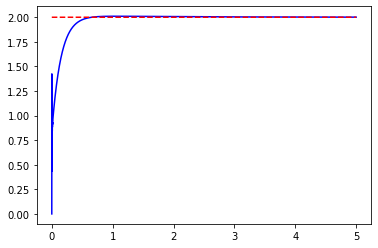

Kp = 12.00000 | Ki = 7.00000 | Kd = 0.70000
Chromosome = 110111100011101000110001100011
Fitness = -15.10232249897005


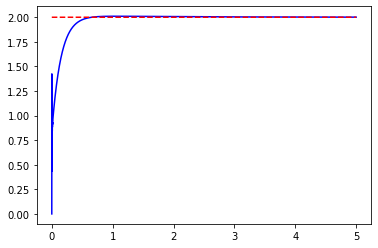

Kp = 12.00000 | Ki = 7.00000 | Kd = 0.70000
Chromosome = 111101000011101000000110000010
Fitness = -14.405199086644531


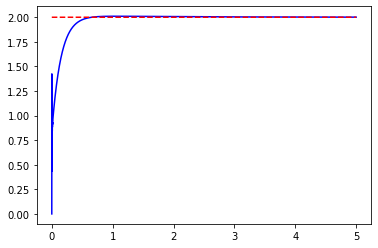

Kp = 12.00000 | Ki = 7.00000 | Kd = 0.70000
Chromosome = 110001010011000010100101000110
Fitness = -11.786173235284494


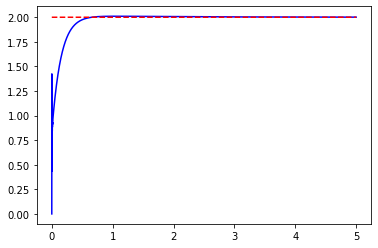

Kp = 12.00000 | Ki = 7.00000 | Kd = 0.70000
Chromosome = 110001010011000010100101000110
Fitness = -11.786173235284494


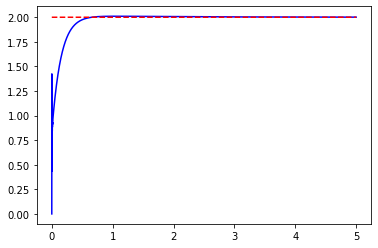

Kp = 12.00000 | Ki = 7.00000 | Kd = 0.70000
Chromosome = 110001010011000010100101000110
Fitness = -11.786173235284494


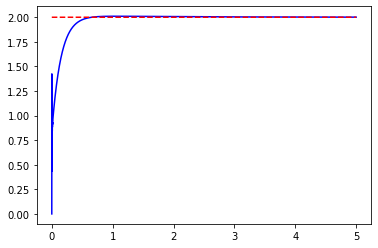

Kp = 12.00000 | Ki = 7.00000 | Kd = 0.70000
Chromosome = 110001010011000010100101000110
Fitness = -11.786173235284494


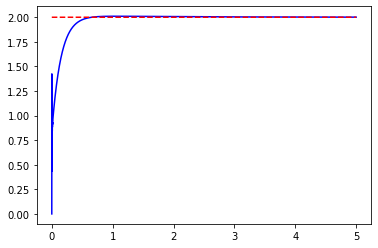

Kp = 12.00000 | Ki = 7.00000 | Kd = 0.70000
Chromosome = 110001010011000010100101000110
Fitness = -11.786173235284494


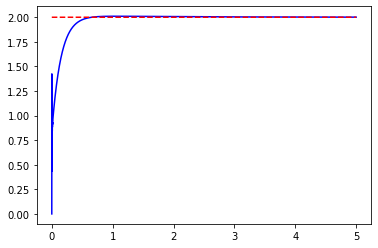

Kp = 12.00000 | Ki = 7.00000 | Kd = 0.70000
Chromosome = 110001010011000010100101000110
Fitness = -11.786173235284494


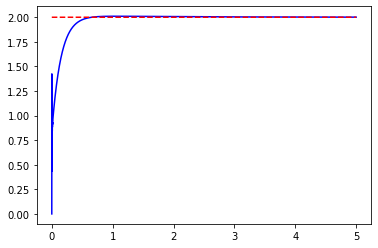

Kp = 12.00000 | Ki = 7.00000 | Kd = 0.70000
Chromosome = 110001010011000010100101000110
Fitness = -11.786173235284494


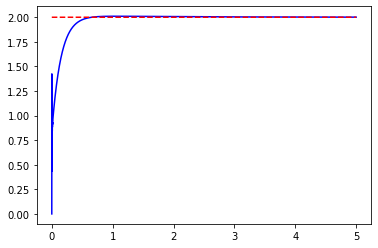

Kp = 12.00000 | Ki = 7.00000 | Kd = 0.70000
Chromosome = 110001010011000010100101000110
Fitness = -11.786173235284494


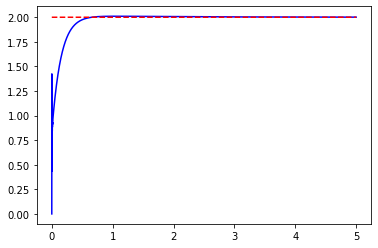

Kp = 12.00000 | Ki = 7.00000 | Kd = 0.70000
Chromosome = 110001010011000010100101000110
Fitness = -11.786173235284494


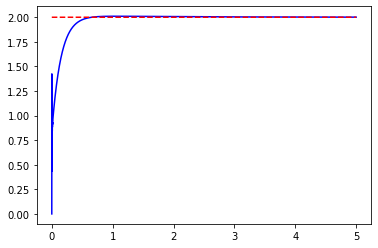

Kp = 12.00000 | Ki = 7.00000 | Kd = 0.70000
Chromosome = 110001010011000010100101000110
Fitness = -11.786173235284494


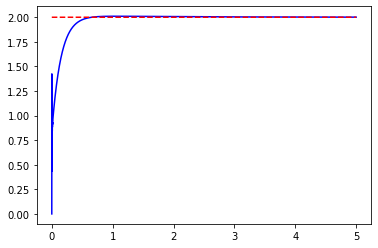

Kp = 12.00000 | Ki = 7.00000 | Kd = 0.70000
Chromosome = 110001010011000010100101000110
Fitness = -11.786173235284494


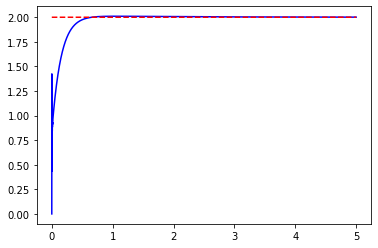

Kp = 12.00000 | Ki = 7.00000 | Kd = 0.70000
Chromosome = 110001010011000010100101000110
Fitness = -11.786173235284494


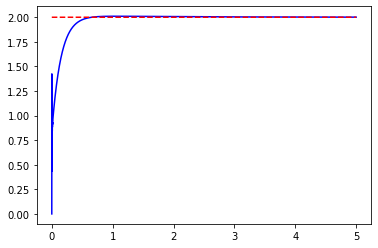

Kp = 12.00000 | Ki = 7.00000 | Kd = 0.70000
Chromosome = 110001010011000010100101000110
Fitness = -11.786173235284494


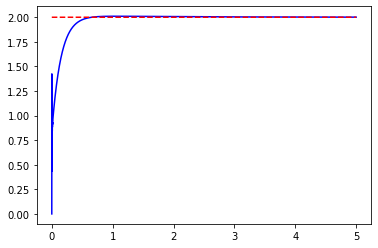

Kp = 12.00000 | Ki = 7.00000 | Kd = 0.70000
Chromosome = 111111111011111001010010100001
Fitness = -9.007221207423246


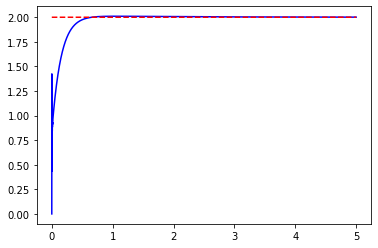

Kp = 12.00000 | Ki = 7.00000 | Kd = 0.70000
Chromosome = 111111111011100101010001011101
Fitness = -22.63293661765118


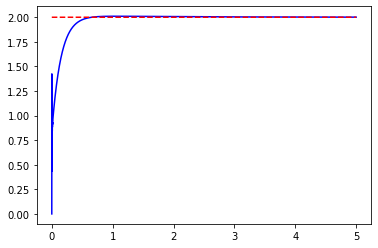

Kp = 12.00000 | Ki = 7.00000 | Kd = 0.70000
Chromosome = 111000011011100101010000111101
Fitness = -9.51865278833727


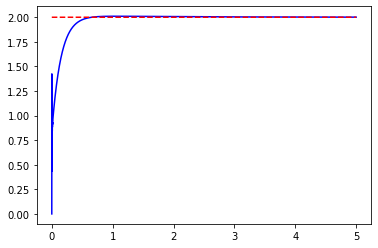

Kp = 12.00000 | Ki = 7.00000 | Kd = 0.70000
Chromosome = 111111111011111010110011000001
Fitness = -8.127978117705444


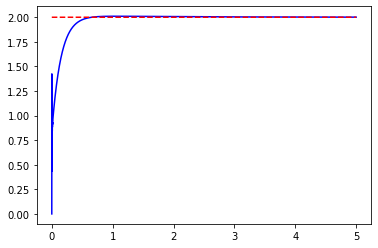

Kp = 12.00000 | Ki = 7.00000 | Kd = 0.70000
Chromosome = 111111111011111110110011000001
Fitness = -6.079596192581269


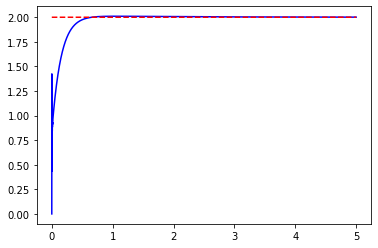

Kp = 12.00000 | Ki = 7.00000 | Kd = 0.70000
Chromosome = 111111110111111101010000000100
Fitness = -6.178575503456809


In [104]:
#playground
random.seed(9000)
print("Running actual use case")

reference = np.load('reference.npy')
K = 2
tau_p = 2

def show_graph(Kp, Ki, Kd):
    dynamics = pid_velocity(Kp, Ki, Kd, reference, K, tau_p, Ti, Tf, Fs)
    t = np.arange(Ti,Tf,Ts)
    fig = plt.figure()
    ax = plt.subplot(111)
    ax.plot(t,dynamics,'b-',
            t,reference[:-1],'r--')
    plt.show()

pop = initPop(40,30)# here number of genes >=30 as 10 bits are required for each of Kp,Ki,Kd
f = usefulFitness
s0 = 40
s1 = 2
s2 = 32
s = selectionTournament
c = crossoverTwoPoint
m = mutationInversion

for i in range(20):
    fit, dude = getBestDude(pop,f)
    
    ### blanks
    Kp = 12
    Ki = 7
    Kd = 0.7
    
    show_graph(Kp,Ki,Kd)
    print(f"Kp = {Kp:.5f} | Ki = {Ki:.5f} | Kd = {Kd:.5f}")
    print(f"Chromosome = {dude}\nFitness = {fit}")
    
    pop = singleIteration(pop,f,s0,s1,s2,s,c,m)

fit, dude = getBestDude(pop,f)
show_graph(Kp,Ki,Kd)
print(f"Kp = {Kp:.5f} | Ki = {Ki:.5f} | Kd = {Kd:.5f}")
print(f"Chromosome = {dude}\nFitness = {fit}")

Fin.